In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import calendar
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
sv_main = pd.read_csv('Severity_data_group6.csv')

In [3]:
sv_main.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance,Description,Street,Side,City,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Day_of_Week
0,3,2/8/2016 5:46,2/8/2016 11:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,R,Dayton,...,False,False,False,False,False,Night,Night,Night,Night,Monday
1,2,2/8/2016 6:07,2/8/2016 6:37,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,L,Reynoldsburg,...,False,False,False,False,False,Night,Night,Night,Day,Monday
2,2,2/8/2016 6:49,2/8/2016 7:19,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,Williamsburg,...,False,False,False,True,False,Night,Night,Day,Day,Monday
3,3,2/8/2016 7:23,2/8/2016 7:53,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,Dayton,...,False,False,False,False,False,Night,Day,Day,Day,Monday
4,2,2/8/2016 7:39,2/8/2016 8:09,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,Dayton,...,False,False,False,True,False,Day,Day,Day,Day,Monday


In [4]:
sv_main.astype('category')

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance,Description,Street,Side,City,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Day_of_Week
0,3,2/8/2016 5:46,2/8/2016 11:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,R,Dayton,...,False,False,False,False,False,Night,Night,Night,Night,Monday
1,2,2/8/2016 6:07,2/8/2016 6:37,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,L,Reynoldsburg,...,False,False,False,False,False,Night,Night,Night,Day,Monday
2,2,2/8/2016 6:49,2/8/2016 7:19,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,Williamsburg,...,False,False,False,True,False,Night,Night,Day,Day,Monday
3,3,2/8/2016 7:23,2/8/2016 7:53,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,Dayton,...,False,False,False,False,False,Night,Day,Day,Day,Monday
4,2,2/8/2016 7:39,2/8/2016 8:09,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,Dayton,...,False,False,False,True,False,Day,Day,Day,Day,Monday
5,3,2/8/2016 7:44,2/8/2016 8:14,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,R,Westerville,...,False,False,False,False,False,Day,Day,Day,Day,Monday
6,2,2/8/2016 7:59,2/8/2016 8:29,39.758274,-84.230507,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,R,Dayton,...,False,False,False,False,False,Day,Day,Day,Day,Monday
7,3,2/8/2016 7:59,2/8/2016 8:29,39.770382,-84.194901,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,R,Dayton,...,False,False,False,False,False,Day,Day,Day,Day,Monday
8,2,2/8/2016 8:00,2/8/2016 8:30,39.778061,-84.172005,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,L,Dayton,...,False,False,False,False,False,Day,Day,Day,Day,Monday
9,3,2/8/2016 8:10,2/8/2016 8:40,40.100590,-82.925194,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,R,Westerville,...,False,False,False,False,False,Day,Day,Day,Day,Monday


In [5]:
sv_main.isnull().sum()

Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance                 0
Description              1
Street                   0
Side                     0
City                     0
County                   0
State                    0
Visibility               0
Wind_Speed               0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
Day_of_Week              0
dtype: int64

#### Dropping some columns which are not required and handling missing values

In [8]:
sv_main['time'] = pd.to_datetime(sv_main.Start_Time, format='%Y-%m-%d %H:%M:%S')

plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(sv_main.loc[sv_main["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

ValueError: time data 2/8/2016 5:46 doesn't match format specified

#### From the above bar plot,it can be inferred that the months October, November and December have highest number of accidents recorded consistently. It could be because of Thanksgiving, BlackFriday and Christmas vacations.

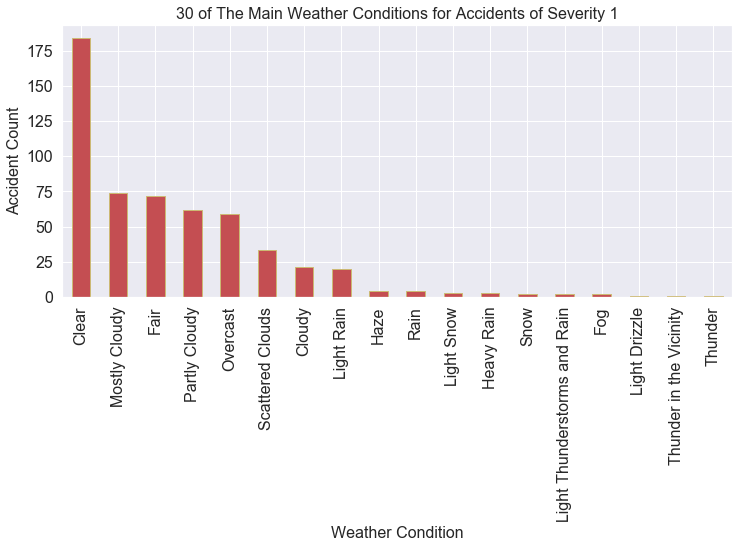

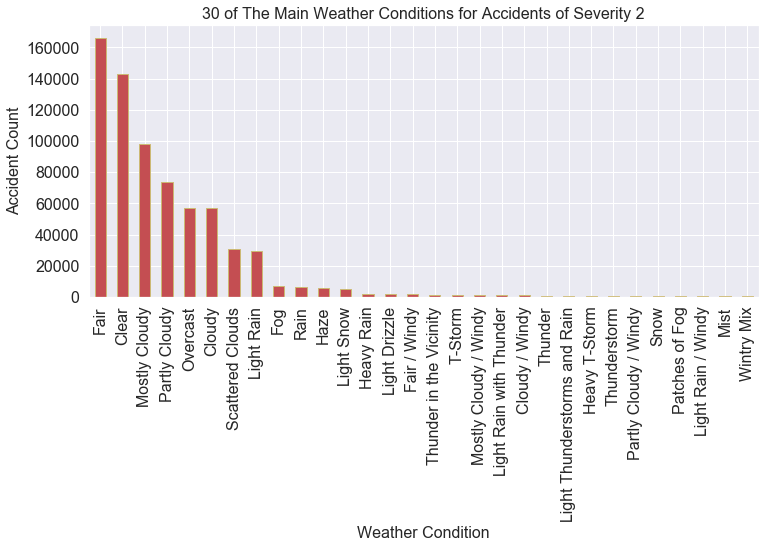

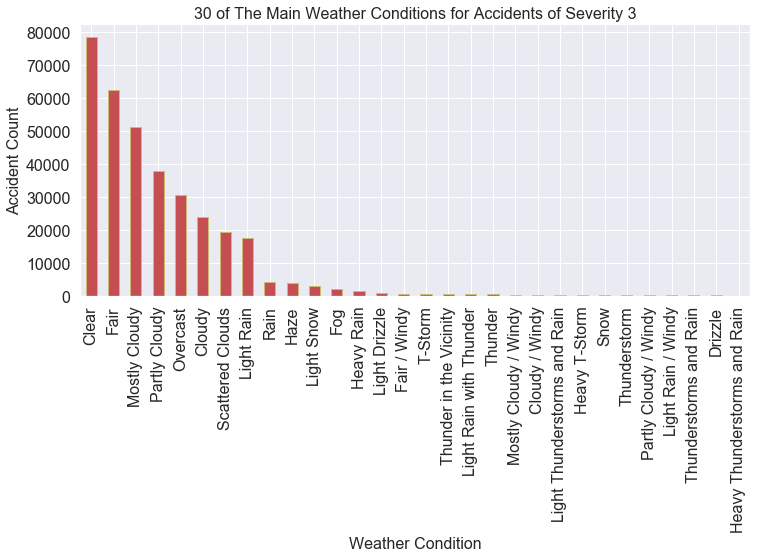

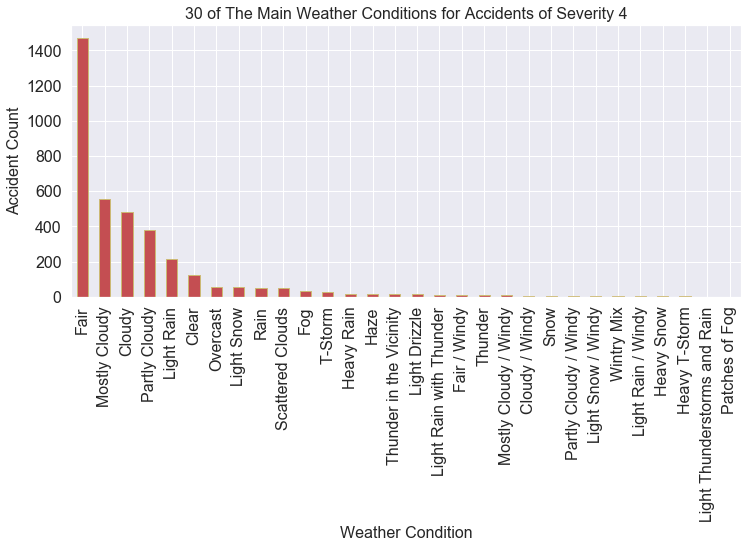

In [9]:
sns.set()
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    sv_main.loc[sv_main["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='r',edgecolor='y',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('30 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

#### From the above plots, we can observe irrespective of severity, most of the accidents happened in clear weather conditions followed by light rain and snowy. As we know rain and snow causes tires to skid which may be reason for accidents. But the accidents in clear weather conditions proves that other factors like roads, signals, drivers experience are playing major role.

In [ ]:
sv_main['Start_Time'] = pd.to_datetime(sv_main['Start_Time'], infer_datetime_format=True)
sv_main['Day_of_Week'] = sv_main['Start_Time'].dt.day_name()

In [ ]:
sv_main[[ 'Start_Time', 'Day_of_Week']].head()

In [ ]:
plt.figure(figsize=(16,10))
sv_main.groupby('Day_of_Week') \
        .size() \
        .sort_values(ascending = True) \
        .iloc[:5] \
        .plot.pie(explode=[0,0,0,0,0.2],autopct='%1.2f%%')
plt.ioff()

#### We can see that Monday, Thursday and friday reported more accidents which are peak days of the week. Friday being weekend start day, reports highest number of accidents may be due to rash driving after parties or rush to go home/vacations etc., However sunday and saturday reports lowest cases as they are rest days.

In [ ]:
sns.set()
weather_factor = [ 'Visibility(mi)', 'Wind_Speed(mph)']

for factor in weather_factor:
   
    mini = sv_main[factor].quantile(q=0.0001)
    maxi = sv_main[factor].quantile(q=0.9999)
    
    plt.subplots(figsize=(16,3))
    for s in np.arange(1,5):
        sv_main["Severity"].groupby(pd.cut(sv_main[factor], np.linspace(mini,maxi,num=20))).mean().plot(color=['green'])
        plt.title("Mean Severity based on " + factor, fontsize=14)
        plt.xlabel(factor + " ", fontsize=14)
        plt.ylabel("Mean Severity", fontsize=14)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)

#### Here, increasing windspeed(mph) causes accidents of severity 2, which implies even wind speed is also not the major factor for severity 4 accidents.

In [ ]:
for area in ['Crossing','Junction', 'No_Exit','Roundabout', 'Station', 'Stop', 'Traffic_Signal', 'Turning_Loop']:
    # check if infrastructure type is found in any record 
    if (sv_main[area] == True).sum() > 0:
        my_colors = ['lightblue','lightsteelblue','silver','green']
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + area,fontsize=18)
        plt.subplot(1,2,1)
        sv_main.loc[sv_main[area] == True]['Severity'].value_counts().plot.bar(width=0.5,color='r',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        sv_main.loc[sv_main[area] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16,colors=my_colors)

#### From this we can see that, severity 4 accidents are mostly happened near Junctions, No_exits. Approximately 176000 accidents recorded near junctions and more than 600000 accidents recorded near traffic signal which are highest cases. In the dashboard graphs we can see that absence of traffic signal or people violating rules are major reasons for these accidents.

In [ ]:
plt.rcParams['figure.figsize'] = (14,12)
sns.heatmap(sv_main.corr(), vmin=-1, vmax=1, center=0,
            square=True, cmap = sns.diverging_palette(240, 10, n=9))
plt.show()

In [10]:
cor = sv_main.corr()

#Correlation with output variable
cor_tarplt.rcParams['figure.figsize'] = (14,12)
sns.heatmap(sv_main.corr(), vmin=-1, vmax=1, center=0,
            square=True, cmap = sns.diverging_palette(240, 10, n=9))
plt.show()get = abs(cor["Severity"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.02]
relevant_features

SyntaxError: invalid syntax (<ipython-input-10-a4c2ebaa9afe>, line 7)

In [ ]:
imp_features =["Severity","Start_Lat","Start_Lng","Distance(mi)","Wind_Speed(mph)","Amenity","Crossing","Junction","Railway","Station","Stop","Traffic_Signal"]

In [ ]:
df_copy1 = sv_main.filter(imp_features, axis=1)

df_copy1.to_csv('Important_features.csv', index=False)

In [ ]:
df_copy1.head()

In [ ]:
from sklearn.model_selection import train_test_split
y_data = df_copy1['Severity'].values
X_data = df_copy1.drop('Severity', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)
X_train.shape

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_train,y_train)
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), df_copy1.columns))) 

In [ ]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

In [ ]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model,X_train,y_train, cv=kfold, scoring=scoring)


In [ ]:
results.mean()

In [ ]:
bool_features = df_copy1.select_dtypes(include=['bool'])
print('Boolean features: {}'.format(bool_features.shape))
one_hot = pd.get_dummies(bool_features)

In [ ]:
one_hot.reset_index(drop=True, inplace=True)
one_hot.head(5)

In [ ]:
numerical_features =  df_copy1.select_dtypes(exclude=['bool'])
sc = StandardScaler()
y = df_copy1[['Severity']].values
y= sc.fit_transform(y)
numerical_features = numerical_features.drop(['Severity'], axis=1)
numerical_features = pd.DataFrame(sc.fit_transform(numerical_features), columns = numerical_features.columns)

In [ ]:
X_data = np.concatenate((one_hot,numerical_features),axis=1)
df_concat = pd.concat([one_hot,numerical_features],axis=1)

In [ ]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_data, y, test_size=0.2, random_state=42)

In [ ]:
tuning = {'n_estimators': [12, 300, 500], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [2, 3]}
grid_rf = GridSearchCV(RandomForestRegressor(warm_start=True),param_grid=tuning, cv = 5)

In [ ]:
grid_rf.fit(X_train1, y_train1)
r2_score(y_test1, grid_rf.predict(X_test1), multioutput='variance_weighted')